# HW13

###### z = f(x,y) = sin(x+y-1)+(x-y-1)^2-1.5*x+2.5*y+1
###### range : -1<x<5, -3<y<4

In [ ]:
# Hessian matrix
H_f = np.array(((2*y+2*y*y, 2*x+4*x*y+2*y+3*y*y),(2*x+4*x*y+2*y+3*y*y,2*x*x+2*x+6*x*y)))

[[ 0.          3.        ]
 [ 0.09916147  2.89916147]
 [ 0.19430768  2.80230768]
 [ 0.28559835  2.70927835]
 [ 0.37318678  2.61991958]
 [ 0.45722012  2.53408361]
 [ 0.53783963  2.45162857]
 [ 0.61518088  2.37241827]
 [ 0.68937402  2.29632191]
 [ 0.76054396  2.22321394]]


<IPython.core.display.Javascript object>


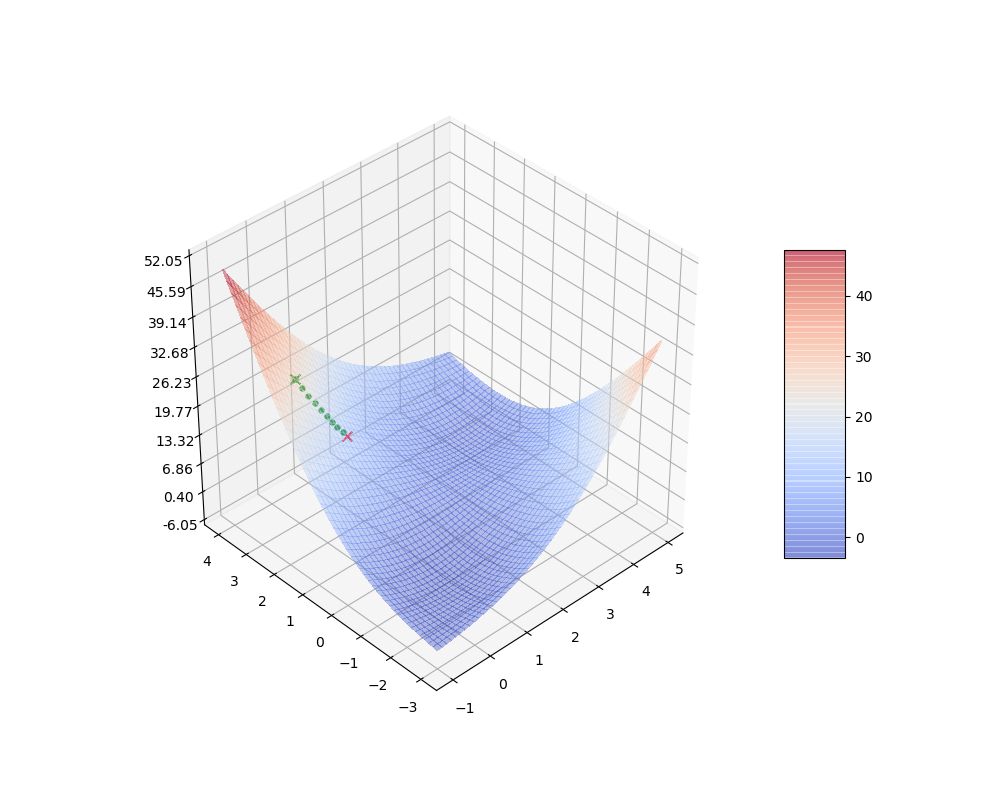

In [168]:
# gradient descent method
# symbols사용 
import sympy

# parameter
ld = 0.01 
itr = 10

# equation
x,y= symbols('x y')
f = sympy.sin(x+y-1)+(x-y-1)**2-1.5*x+2.5*y+1
grad_x = sympy.diff(f,x)
grad_y = sympy.diff(f,y)
gradient=[grad_x,grad_y]


# solving
p_his = np.zeros((itr,2))
p_his[0][0] = random.uniform(-1, 5) # 임의의 점
p_his[0][1] = random.uniform(-2, 4)


p_his[0][0] = 0
p_his[0][1] = 3
for i in range(1,itr):
    p_his[i][0]=p_his[i-1][0] - ld*grad_x.subs([(x, p_his[i-1][0]), (y, p_his[i-1][1])])
    p_his[i][1]=p_his[i-1][1] - ld*grad_y.subs([(x, p_his[i-1][0]), (y, p_his[i-1][1])])
print(p_his)

%matplotlib notebook
# visualization of function z
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import random

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')



# Make data.
x=np.linspace(start=-1,stop=5,num=50)
y=np.linspace(start=-3,stop=4,num=50)
x,y=np.meshgrid(x,y)
z= np.sin(x+y-1)+(x-y-1)**2-1.5*x+2.5*y+1

# Visualization
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0,alpha=.4, antialiased=False)
for i in range(0,itr):
    
    x_p = p_his[i][0]
    y_p = p_his[i][1]
    z_p= np.sin(x_p+y_p-1)+(x_p-y_p-1)**2-1.5*x_p+2.5*y_p+1
    if(i==0):
        ax.scatter(x_p, y_p, z_p,s=50, marker='x',c='g')
    if(i==itr-1):
        ax.scatter(x_p, y_p, z_p,s=50, marker='x',c='r')
    else:
        ax.scatter(x_p, y_p, z_p,s=50, marker='.',c='g')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Newton's method

In [126]:
grad_x.subs([(x,1), (y, 1)])

2*x - 2*y + cos(x + y - 1) - 3.5

In [125]:
hessian[0][0].subs([(x,1), (y, 1)])

-sin(x + y - 1) + 2

In [139]:
a = np.array([(1,2),(3,4)])
print(a)
a_inv=np.linalg.pinv(a)
print(a_inv)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [146]:
a

array([[1, 2],
       [3, 4]])

In [155]:
hes

matrix([[ 2., -2.],
        [-2.,  2.]])

In [152]:
print(hes_inv)
print(hes_inv[0,1])

[[ 0.44662072  0.19662072]
 [ 0.19662072  0.44662072]]
0.196620719325


<IPython.core.display.Javascript object>


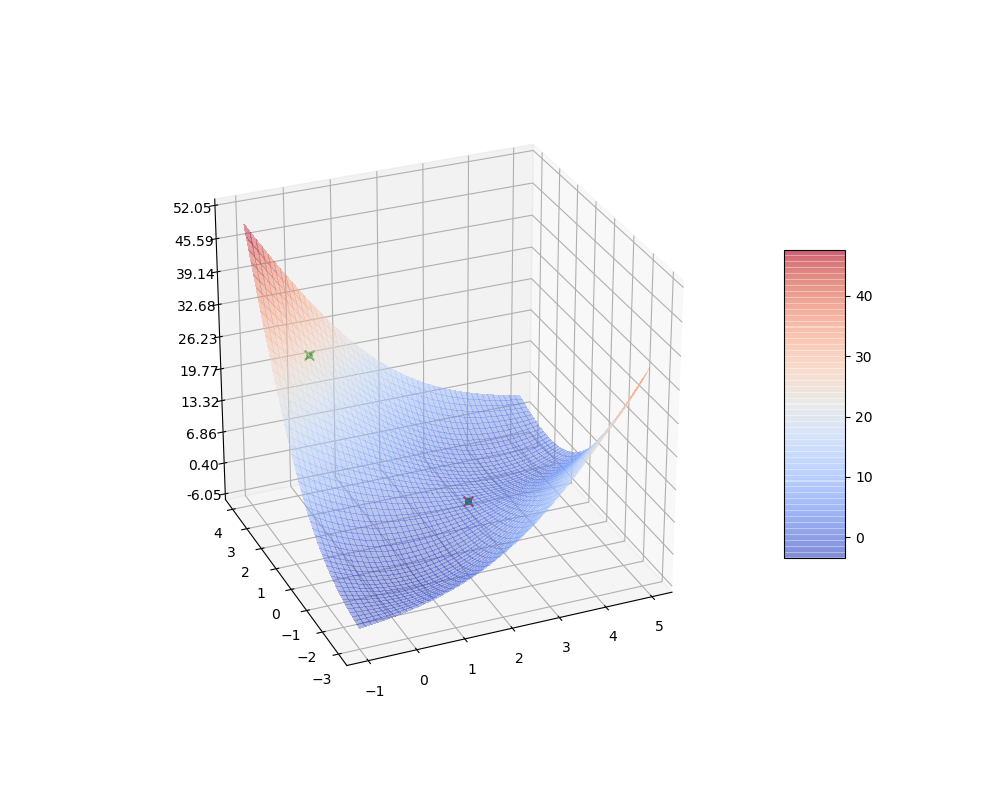

In [170]:
# newton's method
%matplotlib notebook
# visualization of function z
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import random
import sympy # symbols사용

# parameter
ld = 0.01 
itr = 10
ph_his = np.zeros((itr,2))
ph_his[0][0] = random.uniform(-1, 5) # 임의의 점
ph_his[0][1] = random.uniform(-2, 4)
# equation
x,y= symbols('x y')
f = sympy.sin(x+y-1)+(x-y-1)**2-1.5*x+2.5*y+1
grad_x = sympy.diff(f,x)
grad_y = sympy.diff(f,y)
gradient = [grad_x,grad_y]

grad_xx = sympy.diff(grad_x,x)
grad_xy = sympy.diff(grad_x,y)
grad_yx = sympy.diff(grad_y,x)
grad_yy = sympy.diff(grad_y,y)
hessian = [(grad_xx,grad_xy),(grad_yx,grad_yy)]

#trying
ph_his[0][0] = 0
ph_his[0][1] = 3


for i in range(1,itr):
    x_ = grad_x.subs([(x, ph_his[i-1][0]), (y, ph_his[i-1][1])])
    y_ = grad_y.subs([(x, ph_his[i-1][0]), (y, ph_his[i-1][1])])
    xx = grad_xx.subs([(x, ph_his[i-1][0]), (y, ph_his[i-1][1])])
    xy = grad_xy.subs([(x, ph_his[i-1][0]), (y, ph_his[i-1][1])])
    yx = grad_yx.subs([(x, ph_his[i-1][0]), (y, ph_his[i-1][1])])
    yy = grad_yy.subs([(x, ph_his[i-1][0]), (y, ph_his[i-1][1])])
    #print(xx,xy,yx,yy)
    hes = np.matrix([(xx,xy),(yx,yy)], dtype='float')
    #print(hes)
    
    # Hessian matrix recreation
    u, s, vh = np.linalg.svd(hes)  # singular value decomposition of hessian matrix
    s = np.abs(s)  # absolute value for singular values
    s = np.diag(s)  # diagonal matrix with main diagonal vector
    hes = np.matmul(np.matmul(u, s), vh)
    hes_inv = np.linalg.inv(hes)
    xx_ = hes_inv[0,0]
    xy_ = hes_inv[0,1]
    yx_ = hes_inv[1,0]
    yy_ = hes_inv[1,1]
    ph_his[i][0]=ph_his[i-1][0] - (xx_*x_+xy_*y_)
    ph_his[i][1]=ph_his[i-1][1] - (yx_*x_+yy_*y_)
#print(ph_his)


# for graph
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

# Make data.
x=np.linspace(start=-1,stop=5,num=50)
y=np.linspace(start=-3,stop=4,num=50)
x,y=np.meshgrid(x,y)
z= np.sin(x+y-1)+(x-y-1)**2-1.5*x+2.5*y+1

# Visualization
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0,alpha=.4, antialiased=False)
for i in range(0,itr):
    
    x_p = ph_his[i][0]
    y_p = ph_his[i][1]
    z_p= np.sin(x_p+y_p-1)+(x_p-y_p-1)**2-1.5*x_p+2.5*y_p+1
    if(i==0):
        ax.scatter(x_p, y_p, z_p,s=50, marker='x',c='g')
    if(i==itr-1):
        ax.scatter(x_p, y_p, z_p,s=50, marker='x',c='r')
    else:
        ax.scatter(x_p, y_p, z_p,s=50, marker='.',c='g')

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
    hessian = np.matrix([
        [f_hessian[0][0].subs([(x, x_t), (y, y_t)]),
         f_hessian[0][1].subs([(x, x_t), (y, y_t)])],
        [f_hessian[1][0].subs([(x, x_t), (y, y_t)]),
         f_hessian[1][1].subs([(x, x_t), (y, y_t)])]
    ], dtype='float')